# Improving Education in New York City

**Harald Tam &  Roshan Pathre**
<br>
Data Bootcamp
<br>
Professor Zweig
<br>
Fall 2018


## Abstract

Using the PASSNYC data, we examined New York City schools across a number of different factors. Within the data we have information about the performance of students in schools using the metrics of ELA (English Language Arts) Proficiency and Math Proficiency. We want to understand why certain schools perform well and how to improve the performance of those that don’t. A primary factor to consider is School Estimate Income, or the Average Household Income, of families within these schools. An assumption can be made that those schools with higher average incomes perform better, but is this actually the case? It is important that we as a society make sure that students from varied backgrounds have the ability to compete. Should schools that have a greater economic need be funded more to help foster better learning environments? We also will look at the Student Absence Rate and how that correlates to economic need and performance. In schools where absence rates are greater, do the students suffer academically? In order to create a better learning environment, schools should have strong leaders, rigorous instruction, collaborative teachers, and community ties; especially in schools that are underperforming. We have examined 1272 schools including public and charter schools to determine the differentiating factors of high and low performance. 


## Data Input and Libraries

In [1274]:
# Import Packages
import pandas as pd                   # to create and manipulate dataframes
import matplotlib.pyplot as plt       # for data visualization
import matplotlib.ticker as mtick     # for formatting chart axes
import numpy as np                    # for statistical calculations
import sys                            # check Python version
from scipy.stats import norm          # for normal distribution
from math import pi                   # for circle angles


# IPython command, puts plots in notebook 
%matplotlib inline

print('Python version:\n', sys.version, sep='')

Python version:
3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]


In [65]:
# importing the data from the github repository
url = 'https://raw.githubusercontent.com/haraldtam/Data_Bootcamp_Final_Project/master/PASSNYC%20Data.csv'
rawdata = pd.read_csv(url)

In [1488]:
# cleaning the data
cleandata = rawdata.iloc[:,3:41].drop(['SED Code', 'Location Code', 'Latitude', 'Longitude', 'Address (Full)', 'Grades', 
                                      'Grade Low', 'Grade High'], axis = 1)

## Why This Research is Important

In this pie chart we display the percentage of schools that are meeting the target of average student performance, falling short, or going above and beyond. We see a fairly normal distribution of data where 53% of schools are meeting the target. Only 1% of schools are not meeting the target at all, but it is these schools that need the most attention. Additionally we see 25% approaching the target and 21% exceeding the target. 

The following report will explore what factors allow schools to exceed the target and how we can improve the quality of education for the remaining 26% of students still not reaching the targets of their expected grade level. 


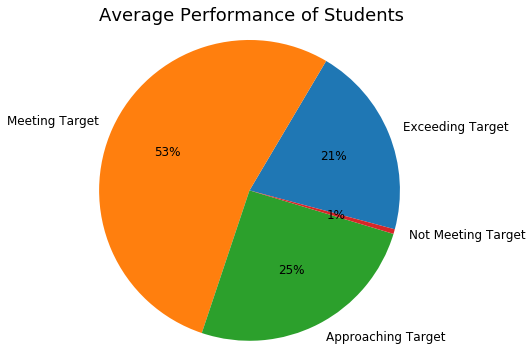

In [1489]:
# Calculating percentage relative to total number of schools
Achievement = pd.DataFrame(cleandata['Student Achievement Rating'])
Exceeding = Achievement[Achievement['Student Achievement Rating']=='Exceeding Target'].count() / Achievement.count()
Meeting = Achievement[Achievement['Student Achievement Rating']=='Meeting Target'].count() / Achievement.count()
Approaching = Achievement[Achievement['Student Achievement Rating']=='Approaching Target'].count() / Achievement.count()
Failing = Achievement[Achievement['Student Achievement Rating']=='Not Meeting Target'].count() / Achievement.count()

# Making the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie([Exceeding, Meeting, Approaching, Failing], autopct='%1.0f%%', textprops={'fontsize': 12},
       labels = ['Exceeding Target', 'Meeting Target', 'Approaching Target', 'Not Meeting Target'], startangle = -15)
ax.axis('equal') 
ax.set_title('Average Performance of Students', fontsize = 18)
plt.show()

### Skew Normal Distribution

The majority of our analysis will focus upon two key metrics of academic performance: the Average level of English Language Arts (ELA) Proficiency and the Average Level of Mathematic Proficiency obtained by students of each school. For both metrics, students are assessed based on a scale of 1-4, designed to reflect their he extent to which students demonstrate the level of understanding expected at their grade level, based on the New York State P-12 Common Core Learning Standards. Each score carries the following meaning: 1 (insufficient), 2 (partial but insufficient), 3 (sufficient), and 4 (more than sufficient).

On a scale such as this, ranging from 1-4, one would expect the probability distribution function to be normal (i.e. a symmetrical around a mean of 2.5), with the majority of students falling within a couple standard deviations of the mean. However, as the histograms below illustrate, our the performance of these New York City schools have a "skew normal distribution," with a greater proportion of students situated below the mean. 

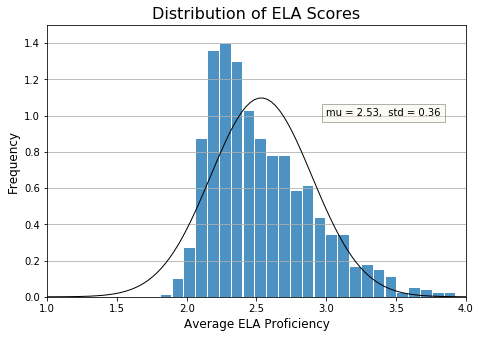

In [699]:
fig, ax = plt.subplots()

# adding the histogram
cleandata['Average ELA Proficiency'].plot(ax = ax, kind = 'hist', bins = 25, rwidth = 0.9, 
                                          figsize = (7.5, 5), alpha = 0.8, density = True)

ax.set_xlabel('Average ELA Proficiency', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
ax.set_title('Distribution of ELA Scores', fontsize = 16)
ax.set_xlim(1, 4)
ax.set_ylim(0, 1.5)
ax.yaxis.grid(True)
ax.text(3, 1,'mu = %.2f,  std = %.2f' % (mu, std), bbox = dict(facecolor = 'beige', alpha=0.3))

# adding the normal distribution line
mu = np.mean(cleandata['Average ELA Proficiency'])
std = np.std(cleandata['Average ELA Proficiency'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)


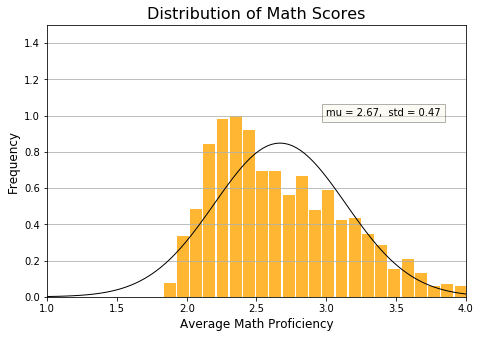

In [1233]:
# Repeating the process for Math Proficiency Scores
fig, ax = plt.subplots()

cleandata['Average Math Proficiency'].plot(ax = ax, kind = 'hist', bins = 25, rwidth = 0.9, 
                                          figsize = (7.5, 5), alpha = 0.8, density = True, color = 'orange')

ax.set_xlabel('Average Math Proficiency', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
ax.set_title('Distribution of Math Scores', fontsize = 16)
ax.set_xlim(1, 4)
ax.set_ylim(0, 1.5)
ax.yaxis.grid(True)
ax.text(3, 1,'mu = %.2f,  std = %.2f' % (mu, std), bbox = dict(facecolor = 'beige', alpha=0.3))

mu = np.mean(cleandata['Average Math Proficiency'])
std = np.std(cleandata['Average Math Proficiency'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

Comparing the distribution of ELA scores with Math scores, it is interesting to note that in a sample of almost 1,300 students, there was a discnerable difference in the variability of Math proficiency. 

### School Performance by District

Here we see the distribution of the ELA and Math performance scores separated by districts rather than individual schools. Districts that score well in ELA also score well in Math. These districts are also indicative of those communities having more income being lumped together. Potential reasoning for this could be NYC zoning laws and cost of living around neighborhoods where district lines are drawn. 

In [572]:
district_ELA = cleandata[['District', 'Average ELA Proficiency', 'Average Math Proficiency']].copy()
district_Math = cleandata[['District', 'Average ELA Proficiency', 'Average Math Proficiency']].copy()

# Creating a new set of DataFrames with school scores grouped by district
for i in range(1,33):
    district_ELA[str(i)] = district_ELA[district_ELA['District']==i].reset_index().loc[:,'Average ELA Proficiency']
    district_Math[str(i)] = district_Math[district_Math['District']==i].reset_index().loc[:,'Average Math Proficiency']

Text(0.5,15,'District')

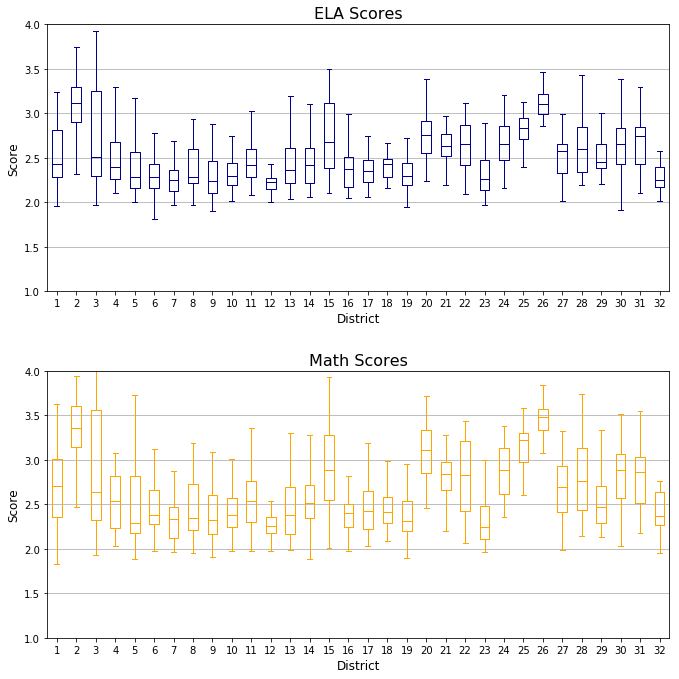

In [1234]:
fig, ax = plt.subplots(nrows = 2, ncols =1, sharex = False)
fig.tight_layout()   # Spreads out the two box charts

# Box Chart for ELA Scores
district_ELA.iloc[:, 3:35].plot(ax = ax[0], kind = 'box', figsize = (10,10), patch_artist = False, 
                                color = 'darkblue', showfliers = False)
ax[0].yaxis.grid(True)
ax[0].set_ylim(1, 4)
ax[0].set_title('ELA Scores', fontsize = 16)
ax[0].set_ylabel('Score', fontsize = 12)
ax[0].set_xlabel('District', fontsize = 12)

#Box Chart for Math Scores
district_Math.iloc[:, 3:35].plot(ax = ax[1], kind = 'box', figsize = (10,10), patch_artist = False, 
                                color = 'orange', showfliers = False)
ax[1].yaxis.grid(True)
ax[1].set_ylim(1, 4)
ax[1].set_title('Math Scores', fontsize = 16)
ax[1].set_ylabel('Score', fontsize = 12)
ax[1].set_xlabel('District', fontsize = 12)


## Investigating the Determinants of High Academic Achievement

### The Correlation Between Wealth and Education

Examining the scatterplot, it is clear that there is a positive correlation between higher household income and academic performance. This is especially true for those households between the $20,000 and $60,000 estimated income range. Once the income surpasses this however, the positive correlation of performance is weaker and more varied. In 2016 the median household income for NYC was $58,856. It is very important to take into consideration that almost all schools under the 3.0 rating have average household incomes lower than that of the city. 

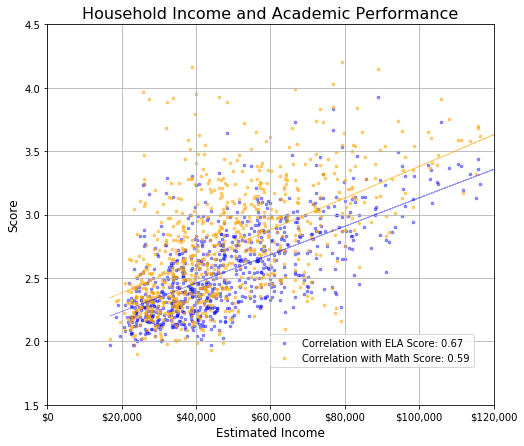

In [1490]:
# Sorting the Data
df = cleandata.loc[:,['School Income Estimate', 'Average ELA Proficiency', 'Average Math Proficiency']].dropna()
Income = df['School Income Estimate'].str.strip('$').str.replace(',','')
Income = pd.to_numeric(Income)
df['School Income Estimate'] = Income
ELA = df['Average ELA Proficiency']
Math = df['Average Math Proficiency']

# calculating correlation statistics
ELA_corr = df.corr().loc['School Income Estimate','Average ELA Proficiency']      
Math_corr= df.corr().loc['School Income Estimate','Average Math Proficiency']

# making a scatter plot
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(Income, ELA, s = 7, alpha = 0.4, color = 'blue')
ax.scatter(Income, Math, s = 7, alpha = 0.5, color = 'orange')
ax.set_ylim(1.5, 4.5)
ax.set_xlim(0, 120000)
ax.set_ylabel('Score', fontsize = 12)
ax.set_xlabel('Estimated Income', fontsize = 12)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.grid(True)
ax.set_title('Household Income and Academic Performance', fontsize = 16)
ax.legend(['Correlation with ELA Score: %.2f' % ELA_corr, 
           'Correlation with Math Score: %.2f' % Math_corr], loc = (0.5,.10))

# plotting lines of best fit
z1 = np.polyfit(Income, ELA, 1)
p1 = np.poly1d(z1)
plt.plot(Income, p1(Income), linewidth = 0.5, alpha = 0.4, color = 'blue')

z2 = np.polyfit(Income, Math, 1)
p2 = np.poly1d(z2)
plt.plot(Income, p2(Income), linewidth = 0.5, alpha = 0.5, color = 'orange')

plt.show()

### Student Attendance Rates

Examining the bubble chart, we observe multiple positive correlations with achievement scores of schools. Those schools that have higher attendance rates also tend to score higher academically. In addition, as the attendance rates increase, so does the size of the bubble indicating household income. There are a few outliers, but generally the wealthier the school, the better attendance and better the scores. There seems to be a particular increase past 94% and once again we see the effect that household income has on a child’s education. 

Text(0.5,1,'Impact of Attendance Rates on Academic Achievement')

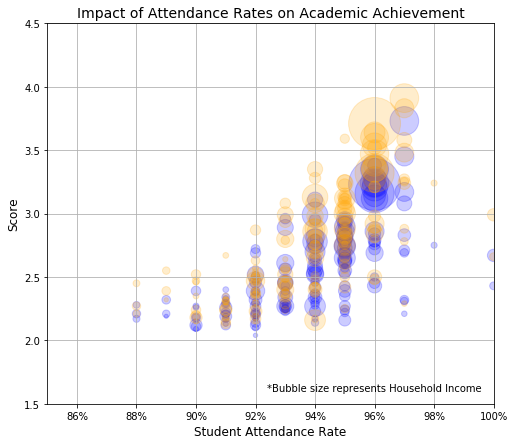

In [1492]:
cleandata
df = cleandata.loc[:,['School Income Estimate', 'Student Attendance Rate',
                      'Average ELA Proficiency', 'Average Math Proficiency']].dropna()
Income = df['School Income Estimate'].str.strip('$').str.replace(',','')
Income = pd.to_numeric(Income)
df['School Income Estimate'] = Income
Attendance = df['Student Attendance Rate'].str.strip('%').astype('float')
df['Student Attendance Rate'] = Attendance

ELA = df.sample(frac=0.2, replace = False)

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(ELA['Student Attendance Rate'], ELA['Average ELA Proficiency'], 
           s = (ELA['School Income Estimate']/5000)**2.2, alpha = 0.2, color = 'blue')
ax.scatter(ELA['Student Attendance Rate'], ELA['Average Math Proficiency'], 
           s = (ELA['School Income Estimate']/5000)**2.2, alpha = 0.2, color = 'Orange')
ax.set_ylim(1.5, 4.5)
ax.set_xlim(85, 100)
ax.set_ylabel('Score', fontsize = 12)
ax.set_xlabel('Student Attendance Rate', fontsize = 12)
fmt = '{x:.0f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.grid(True)
ax.text(99.6, 1.6, '*Bubble size represents Household Income', horizontalalignment='right', fontsize = 10)
ax.set_title('Impact of Attendance Rates on Academic Achievement', fontsize = 14)

### 7 Factor Model: Comparison of Best and Worst Performing Schools

In these Radar charts we are able to compare the best performing schools to the worst performing schools. Although multiple factors are at play and are important, the data indicates that the overwhelming differentiating factor is household income. Simply because that is the main factor however, does not mean the others cannot impact improvement. A well rounded education is crucial and for this to happen we cannot let students fall behind in math. By examining the differences between the Math and ELA scores we can see that there is more room for factors other than household income to affect math scores. The distribution shows that there is a greater standard deviation among math scores than ELA. Additionally, when looking at the box plots we see a greater variance among the math scores. Although it is apparent that household income is an indicator of high scores, there is clear signs that collaborative teachers, a supportive environment, and strong community ties can drastically improve performance. By building on these factors, schools can increase motivation and create better learning environments. 


In [1394]:
# Indexing and Selecting Data
Radar = pd.DataFrame(cleandata.loc[:, ['School Income Estimate', 'Rigorous Instruction %', 
                                       'Collaborative Teachers %', 'Supportive Environment %', 
                                       'Effective School Leadership %', 'Strong Family-Community Ties %', 
                                       'Trust %', 'Average ELA Proficiency', 'Average Math Proficiency']]).dropna()

# Sorting the Data to find the Top and Bottom Performers
Top_ELA = Radar.sort_values(by = ['Average ELA Proficiency'], ascending = False).head(1)
Bottom_ELA = Radar.sort_values(by = ['Average ELA Proficiency'], ascending = True).head(1)
Top_Math = Radar.sort_values(by = ['Average Math Proficiency'], ascending = False).head(1)
Bottom_Math = Radar.sort_values(by = ['Average Math Proficiency'], ascending = True).head(1)

# Cleaning up
Top_ELA_Radar = Top_ELA.drop(['Average ELA Proficiency', 'Average Math Proficiency'], axis = 1)
Bottom_ELA_Radar = Bottom_ELA.drop(['Average ELA Proficiency', 'Average Math Proficiency'], axis = 1)
Top_Math_Radar = Top_Math.drop(['Average ELA Proficiency', 'Average Math Proficiency'], axis = 1)
Bottom_Math_Radar = Bottom_Math.drop(['Average ELA Proficiency', 'Average Math Proficiency'], axis = 1)


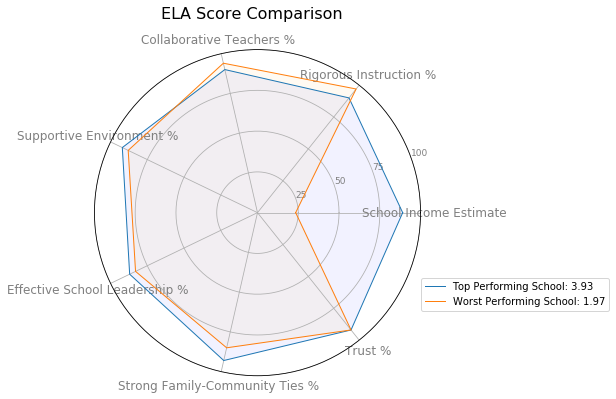

In [1395]:
# Processing the data
x = Top_ELA_Radar.values.tolist()[0]
Top = [float(i.strip('%').strip('$').replace(',','')) for i in x]
Top[0] = Top[0]/1000
Top += Top[:1]

y = Bottom_ELA_Radar.values.tolist()[0]
Bottom = [float(i.strip('%').strip('$').replace(',','')) for i in y]
Bottom[0] = Bottom[0]/1000
Bottom += Bottom[:1]

# Designing the chart
categories=list(Top_ELA_Radar)
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Drawing the outline
fig, ax = plt.subplots(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# xlabels
plt.xticks(angles[:-1], categories, color='grey', size=12)
 
# ylabels
ax.set_rlabel_position(20)
plt.yticks([25, 50, 75, 100], ["25", "50", "75", "100"], color="grey", size=9)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, Top, linewidth=1, linestyle='solid')
ax.plot(angles, Bottom, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, Top, 'b', alpha=0.05)
ax.fill(angles, Bottom, 'orange', alpha = 0.05)

# Title and Legend
plt.suptitle("ELA Score Comparison", fontsize = 16)
ax.legend(['Top Performing School: %.2f'% Top_ELA['Average ELA Proficiency'], 
           'Worst Performing School: %.2f'% Bottom_ELA['Average ELA Proficiency']], loc = (1,0.2))


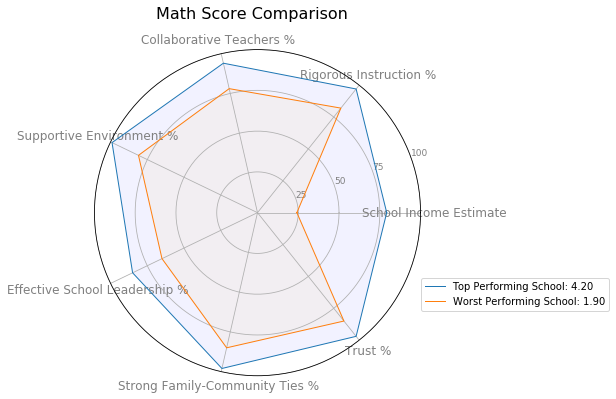

In [1396]:
# Repeating for the Best & Worst Math Schools

# Processing the data
x = Top_Math_Radar.values.tolist()[0]
Top = [float(i.strip('%').strip('$').replace(',','')) for i in x]
Top[0] = Top[0]/1000
Top += Top[:1]

y = Bottom_Math_Radar.values.tolist()[0]
Bottom = [float(i.strip('%').strip('$').replace(',','')) for i in y]
Bottom[0] = Bottom[0]/1000
Bottom += Bottom[:1]

# Designing the chart
categories=list(Top_ELA_Radar)
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Drawing the outline
fig, ax = plt.subplots(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# xlabels
plt.xticks(angles[:-1], categories, color='grey', size=12)
 
# ylabels
ax.set_rlabel_position(20)
plt.yticks([25, 50, 75, 100], ["25", "50", "75", "100"], color="grey", size=9)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, Top, linewidth=1, linestyle='solid')
ax.plot(angles, Bottom, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, Top, 'b', alpha=0.05)
ax.fill(angles, Bottom, 'orange', alpha = 0.05)

# Title and Legend
plt.suptitle("Math Score Comparison", fontsize = 16)
ax.legend(['Top Performing School: %.2f'% Top_Math['Average Math Proficiency'], 
           'Worst Performing School: %.2f'% Bottom_Math['Average Math Proficiency']], loc = (1,0.2))

Through the data, we are able to confirm that high performing schools in New York City have a number of linked factors. The primary factor displaying positive correlation with high scores is the School Income Estimate. As we predicted, those schools with higher average household incomes tend perform better in ELA and Math scores. This is especially true up till the $60,000 mark. We also noticed more variability in performance amongst math scores and more ability for other factors to change these scores. Attendance is a major factor linked to high scores. A family can only do their best to increase income, however by promoting higher attendance rates schools can increase participation and engage students more. Additionally, it is not simply enough to have kids show up, but they need to be supported well and inspired to learn. By promoting teachers to collaborate and grow the school community, students can feel more welcomed into their education. A supportive and welcoming environment also opens opportunity for more rigorous instruction and a chance for students to push themselves. 
